# This notebook plots the error and accuracy of each 2D tested models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Reading results files from applied models:

In [2]:
def readResults(path, filename):
    f = open(path + filename, "r")
    perfs = []

    lines = f.readlines()

    indexes = []

    for el in lines:

        values = []
        idxs   = []

        elements = el.split(" ")

        idxs.append(elements[0])

        elements = elements[1:]


        for i, val in enumerate(elements):
            if("\n" not in val):
                if i ==0:
                    values.append(int(val.split(",")[0]))
                else:
                    values.append(float(val.split("=")[1]))
                    idxs.append(val.split("=")[0])


        indexes.append(idxs)
        perfs.append(values)


    f.close()
    return perfs, indexes

#### Plotting the results:

In [3]:
## Defining the plot function:

def plotPerf(Epochs, train_loss, train_acc, valid_bc_acc, valid_loss, valid_window_acc,
             name = "Model", vert_line = False, at_x_value = 40):
    
    plt.figure(figsize=(20,10))

    
    labels = ["training running loss", "training running accuracy", "validation best class accuracy", "validation loss", "validation window accuracy"]
    for i, values in enumerate([train_loss, train_acc, valid_bc_acc, valid_loss, valid_window_acc]):
        plt.plot(Epochs, values, label=labels[i])
    
    ## If the user wants to plot a vertical line, we do so at_x_value:
    if(vert_line):plt.axvline(x=at_x_value,color='gray', label="Optimal Capacity", linestyle='--')
    
    plt.title("The performance of the " + name, fontsize=20)
    plt.xlabel("Number of Epochs", fontsize=15)
    #plt.ylabel("")
    leg = plt.legend(loc='upper right', ncol=1, mode="no", shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.8)
    plt.show()
    

In [4]:
def PlotPerfs(name, used_var):
    Epochs           = [used_var[i][0] for i in range (0, len(used_var))]
    train_loss       = [used_var[i][1] for i in range (0, len(used_var))]
    train_acc        = [used_var[i][2] for i in range (0, len(used_var))]
    valid_bc_acc     = [used_var[i][3] for i in range (0, len(used_var))]
    valid_loss       = [used_var[i][4] for i in range (0, len(used_var))]
    valid_window_acc = [used_var[i][5] for i in range (0, len(used_var))]
    
    plotPerf(Epochs, train_loss, train_acc, valid_bc_acc, valid_loss, valid_window_acc, name)

    ## Computing max accuracy on validation in percentage:
    Max_accuracy = max(valid_bc_acc) * 100

    print('\n \t\t\t\t Maximum accuracy in percentage on validation set is : {}'.format(int(Max_accuracy* 1.e+3)*1.e-3))

## First 2D models:

### I- With 1000ms processing:

#### 1- Results of the model with a Conv2d kernel = (3, 3), maxpool = (2f, 3t), Energy_size =30, Energy_stride = 15, CNNlays=4, initial lr=0.005: 

In [5]:
path = "exp/SincNet2D_DCASE/CNNlay4_Rand0PreEnergy1000ms_Scheduler0.2_Window800ms_PReLu_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename+= "_Notebook"
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

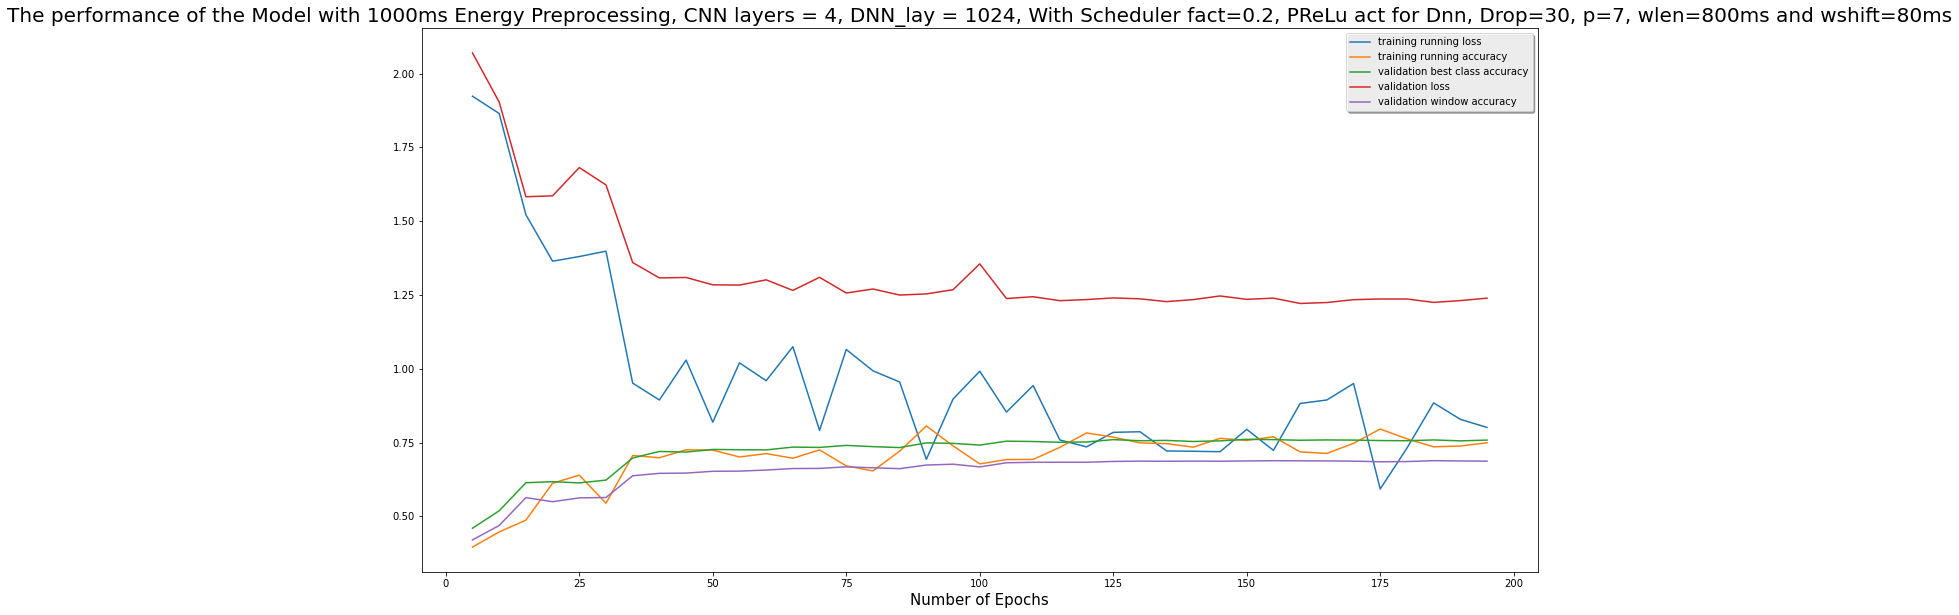


 				 Maximum accuracy in percentage on validation set is : 76.095

					    This model used 11,180,020 parameters.


In [6]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, CNN layers = 4, DNN_lay = 1024, With Scheduler fact=0.2, PReLu act for Dnn, Drop=30, p=7, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format("11,180,020"))

#### 2- Results of the model with CNNlays=3, Conv2d kernel = (3, 3), maxpool = (2f, 3t), Energy_size =30, Energy_stride = 15, initial lr=0.005: 

In [7]:
path = "exp/SincNet2D_DCASE/CNNlay3_Rand0PreEnergy1000ms_Scheduler0.2_Window800ms_PReLu_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename+= "_Notebook"
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

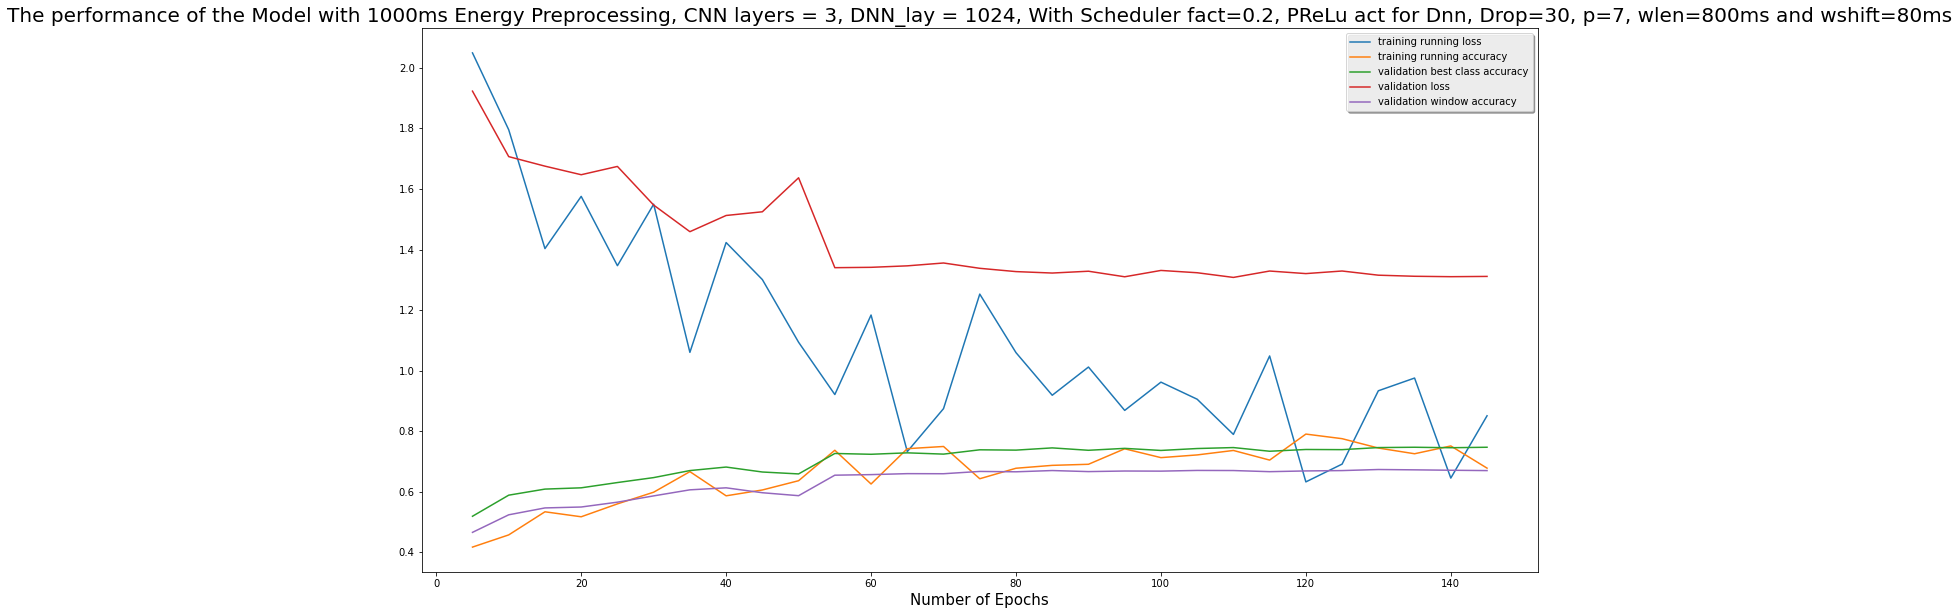


 				 Maximum accuracy in percentage on validation set is : 74.67

					    This model used 24,186,040 parameters.


In [8]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, CNN layers = 3, DNN_lay = 1024, With Scheduler fact=0.2, PReLu act for Dnn, Drop=30, p=7, wlen=800ms and wshift=80ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format("24,186,040"))

#### 3- Results of the model with a CNNlays=5, Conv2d kernel = (3, 3), maxpool = (2f, 3t), Energy_size =30, Energy_stride = 15, initial lr=0.005: 

In [9]:
path = "exp/SincNet2D_DCASE/CNNlay5_Rand0PreEnergy1000ms_Scheduler0.2_Window800ms_PReLu_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

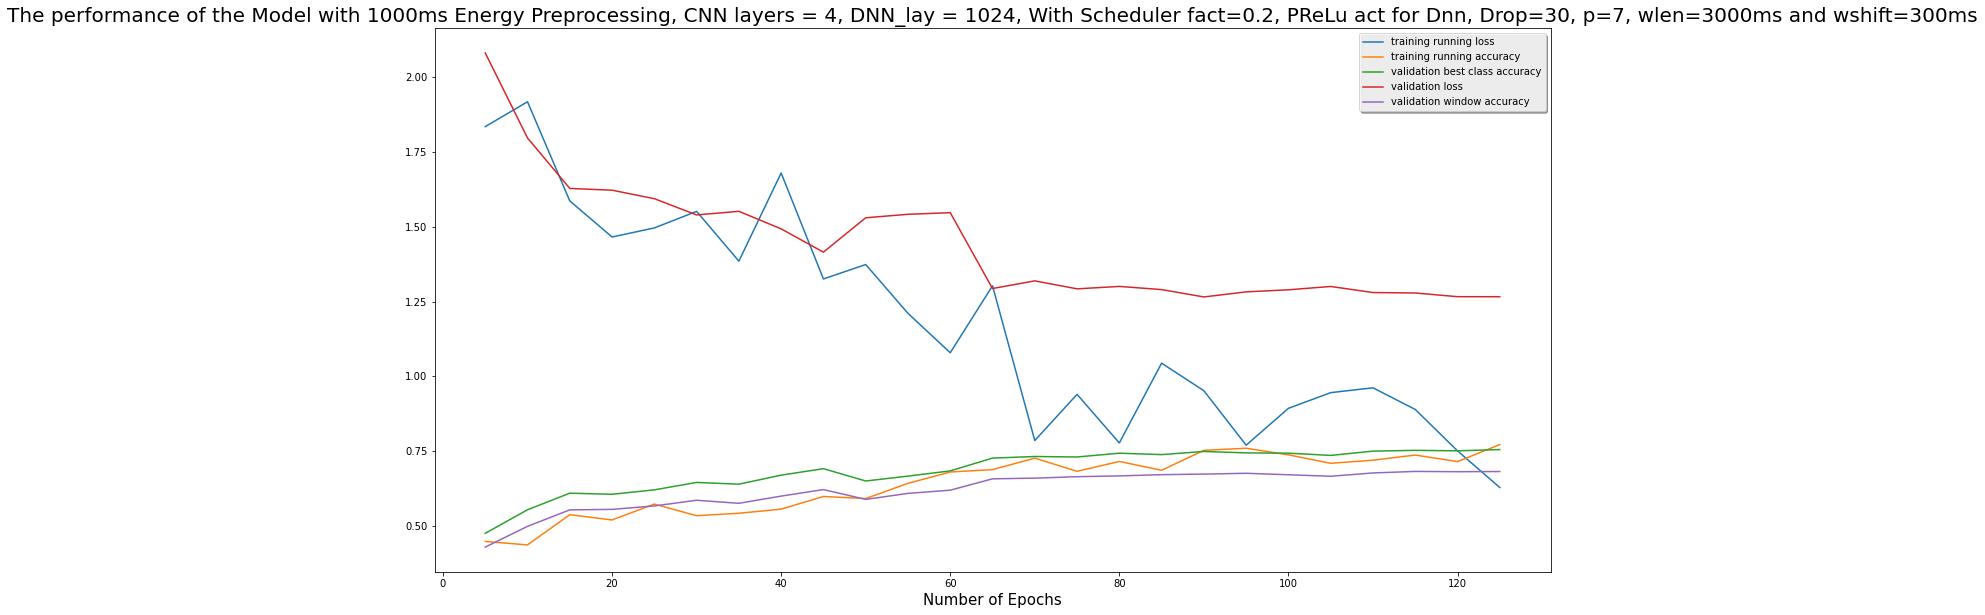


 				 Maximum accuracy in percentage on validation set is : 75.56700000000001

					    This model used 26,018,540 parameters.


In [10]:
## Organizing all the needed data in lists:
name = 'Model with 1000ms Energy Preprocessing, CNN layers = 4, DNN_lay = 1024, With Scheduler fact=0.2, PReLu act for Dnn, Drop=30, p=7, wlen=3000ms and wshift=300ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format("26,018,540"))

### II- With 4000ms processing and wlen = 3000ms:

#### 1- Results of the model with CNNlays=4, Conv2d kernel = (3, 3), maxpool = (2f, 3t), Energy_size =60, Energy_stride = 30, initial lr=0.001:

In [11]:
path = "exp/SincNet2D_DCASE/CNNlay4_Rand0PreEnergy4000ms_Scheduler0.2_Window3000ms_PReLu_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

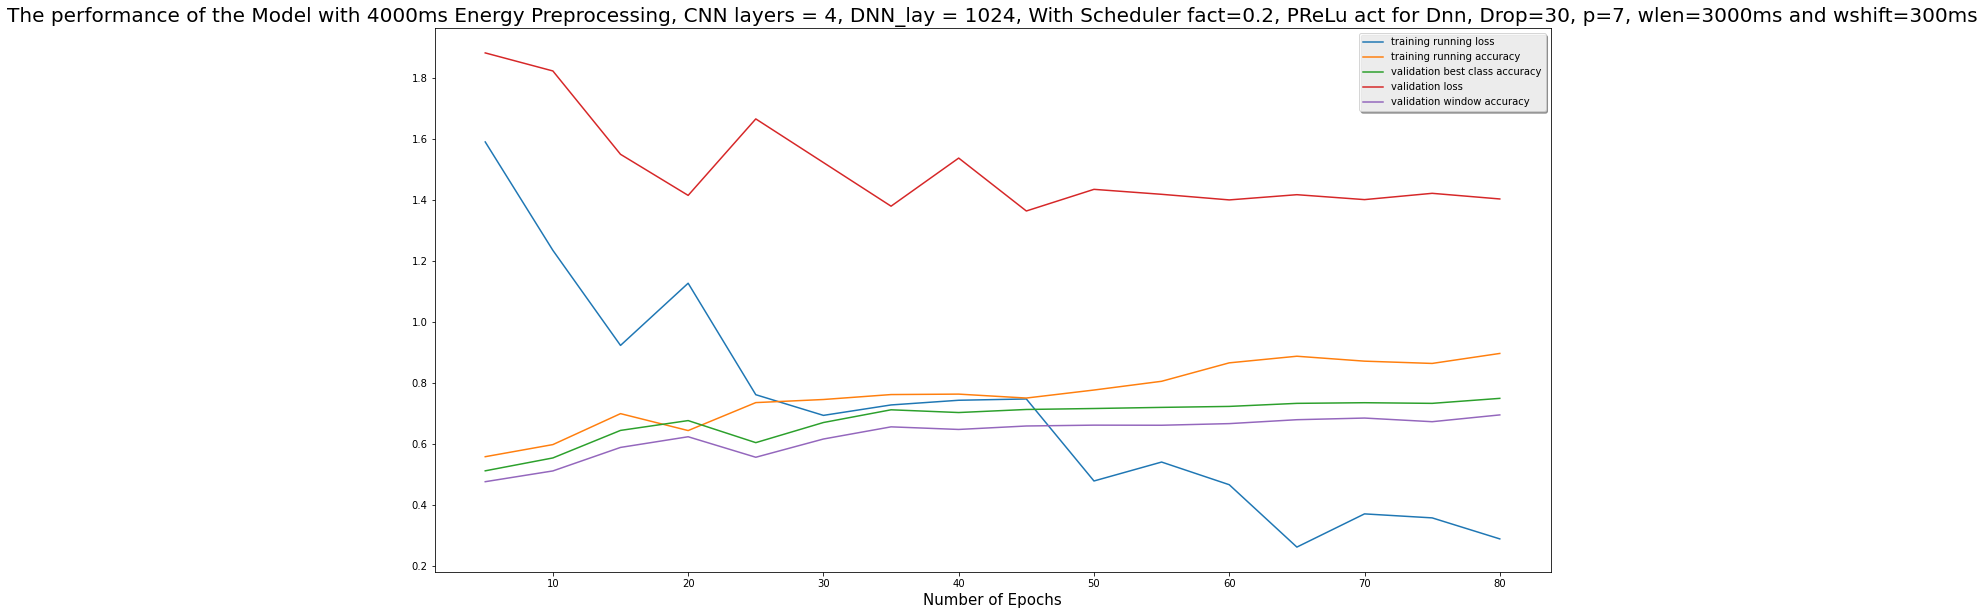


 				 Maximum accuracy in percentage on validation set is : 75.039

					    This model used 26,016,140 parameters.


In [12]:
## Organizing all the needed data in lists:
name = 'Model with 4000ms Energy Preprocessing, CNN layers = 4, DNN_lay = 1024, With Scheduler fact=0.2, PReLu act for Dnn, Drop=30, p=7, wlen=3000ms and wshift=300ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format("26,016,140"))

#### 2- Results of the model with a CNNlays=5, Conv2d kernel = (3, 3), maxpool = (2f, 2t), Energy_size =60, Energy_stride = 30, initial lr=0.005:

In [13]:
path = "exp/SincNet2D_DCASE/CNNlay5_Rand0PreEnergy4000ms_Scheduler0.2_Window3000ms_PReLu_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

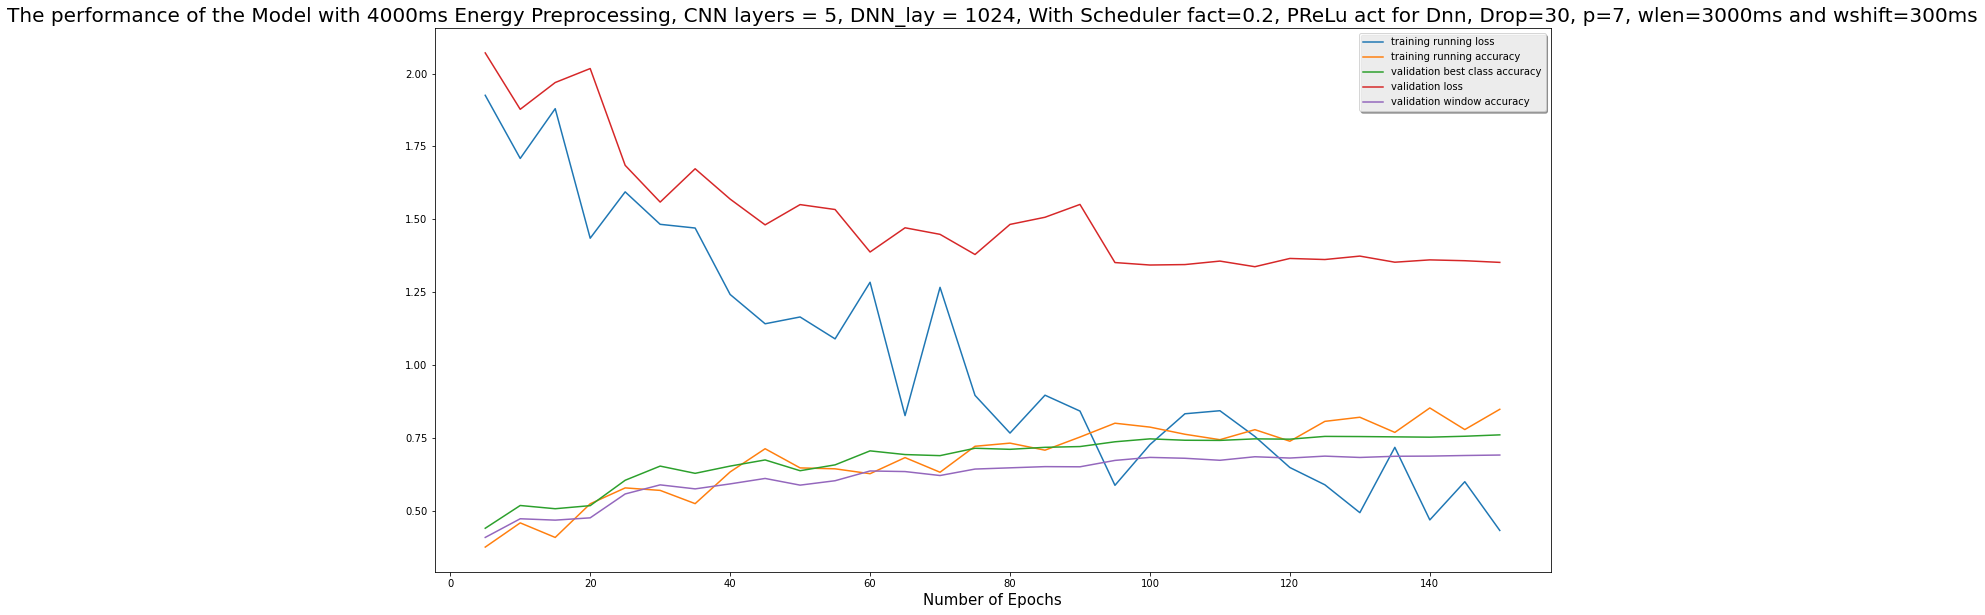


 				 Maximum accuracy in percentage on validation set is : 76.095

					    This model used 11,142,640 parameters.


In [14]:
## Organizing all the needed data in lists:
name = 'Model with 4000ms Energy Preprocessing, CNN layers = 5, DNN_lay = 1024, With Scheduler fact=0.2, PReLu act for Dnn, Drop=30, p=7, wlen=3000ms and wshift=300ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format("11,142,640"))

#### 3- Results of the model with a CNNlays=4, Conv2d kernel = (3, 5), maxpool = (2f, 3t), Energy_size =600, Energy_stride = 300, initial lr=0.005:

In [15]:
path = "exp/SincNet2D_DCASE/CNNlay4_Rand0PreEnergy4000ms_ModifCNN_Scheduler0.2_Window3000ms_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

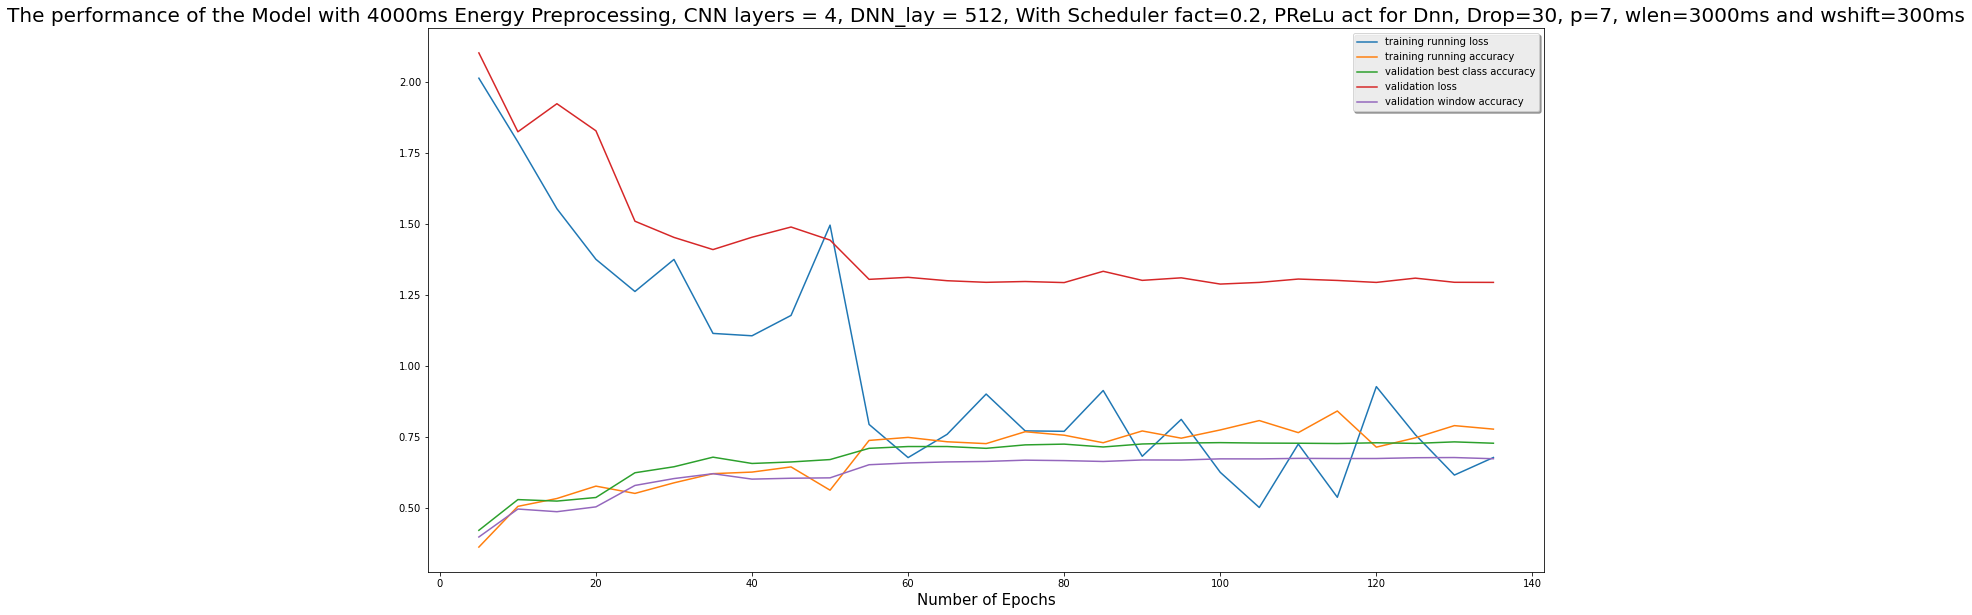


 				 Maximum accuracy in percentage on validation set is : 73.19200000000001

					    This model used 21,231,711 parameters.


In [16]:
## Organizing all the needed data in lists:
name = 'Model with 4000ms Energy Preprocessing, CNN layers = 4, DNN_lay = 512, With Scheduler fact=0.2, PReLu act for Dnn, Drop=30, p=7, wlen=3000ms and wshift=300ms'

PlotPerfs(name, used_var),
print("\n\t\t\t\t\t    This model used {} parameters.".format("21,231,711"))


#### 4- Results of the model with a CNNlays=5, Conv2d kernel = (3, 3), maxpool = (2f, 2t), Energy_size =600, Energy_stride = 300, initial lr=0.005:

In [17]:
path = "exp/SincNet2D_DCASE/CNNlay5_Rand0PreEnergy4000ms_Scheduler0.2_Window3000ms_PReLu_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename+= "_Energy600_Notebook"
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

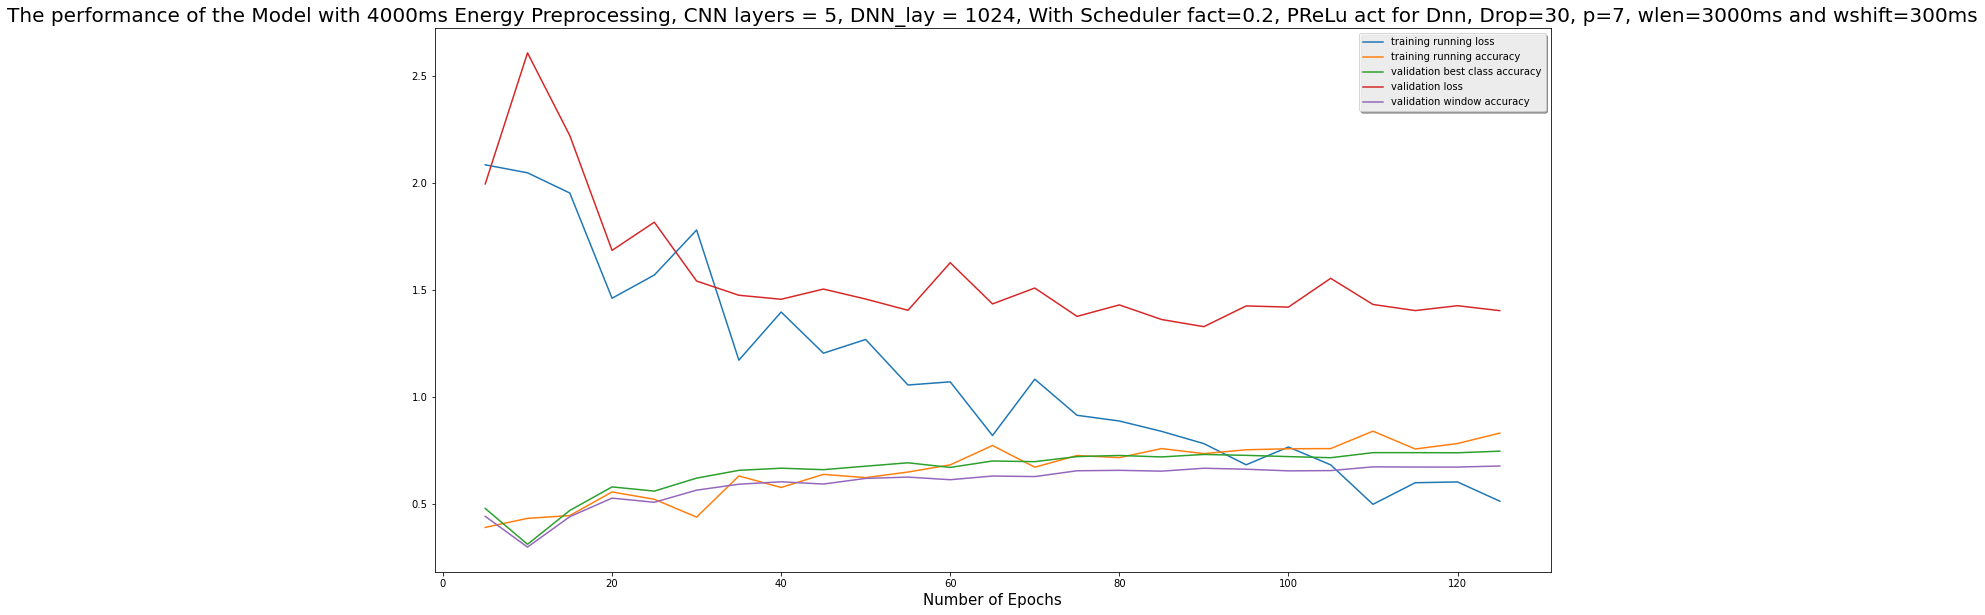


 				 Maximum accuracy in percentage on validation set is : 74.56400000000001

					    This model used 2,952,320 parameters.


In [18]:
## Organizing all the needed data in lists:
name = 'Model with 4000ms Energy Preprocessing, CNN layers = 5, DNN_lay = 1024, With Scheduler fact=0.2, PReLu act for Dnn, Drop=30, p=7, wlen=3000ms and wshift=300ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format("2,952,320"))

### III- With 4000ms processing and wlen = 4000ms and fs=16kHz:

#### 1- Results of the model with a CNNlays=4, Conv2d kernel = (5, 3), maxpool = (2f, 2t), Energy_size =600, Energy_stride = 300, initial lr=0.0005

In [19]:
path = "exp/SincNet2D_DCASE/CNNlay4_Rand0PreEnergy4000ms_Scheduler_Window4000ms_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename+= "_Notebook"
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

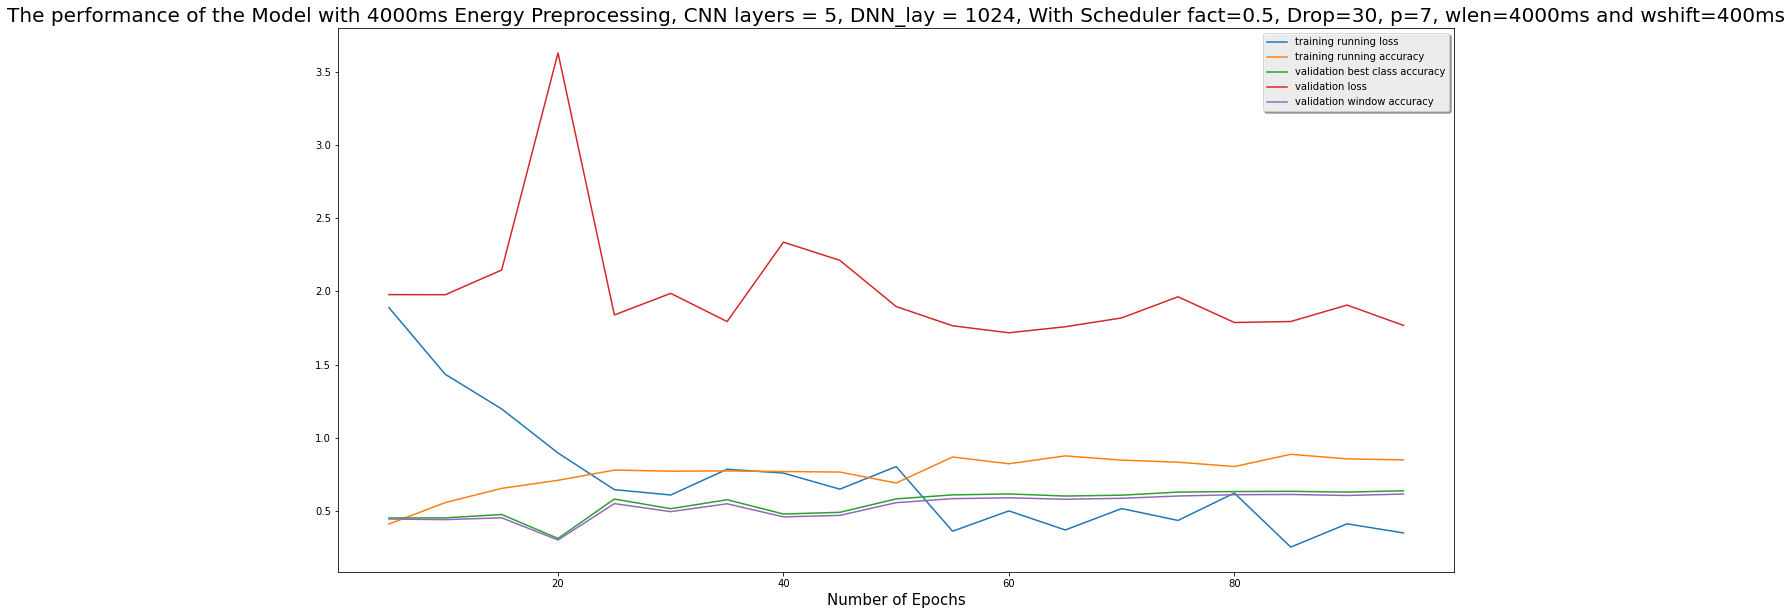


 				 Maximum accuracy in percentage on validation set is : 63.693

					    This model used 3,380,800 parameters.


In [20]:
## Organizing all the needed data in lists:
name = 'Model with 4000ms Energy Preprocessing, CNN layers = 5, DNN_lay = 1024, With Scheduler fact=0.5, Drop=30, p=7, wlen=4000ms and wshift=400ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format("3,380,800"))

#### 2- Results of the model with a CNNlays=4, DNNSize=512, Conv2d kernel = (5, 3), maxpool = (2f, 2t), Energy_size =600, Energy_stride = 300, initial lr=0.0005

In [21]:
path = "exp/SincNet2D_DCASE/CNNlay4_Rand0PreEnergy4000ms_DNN512_Scheduler_Window4000ms_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename+= "_Notebook"
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

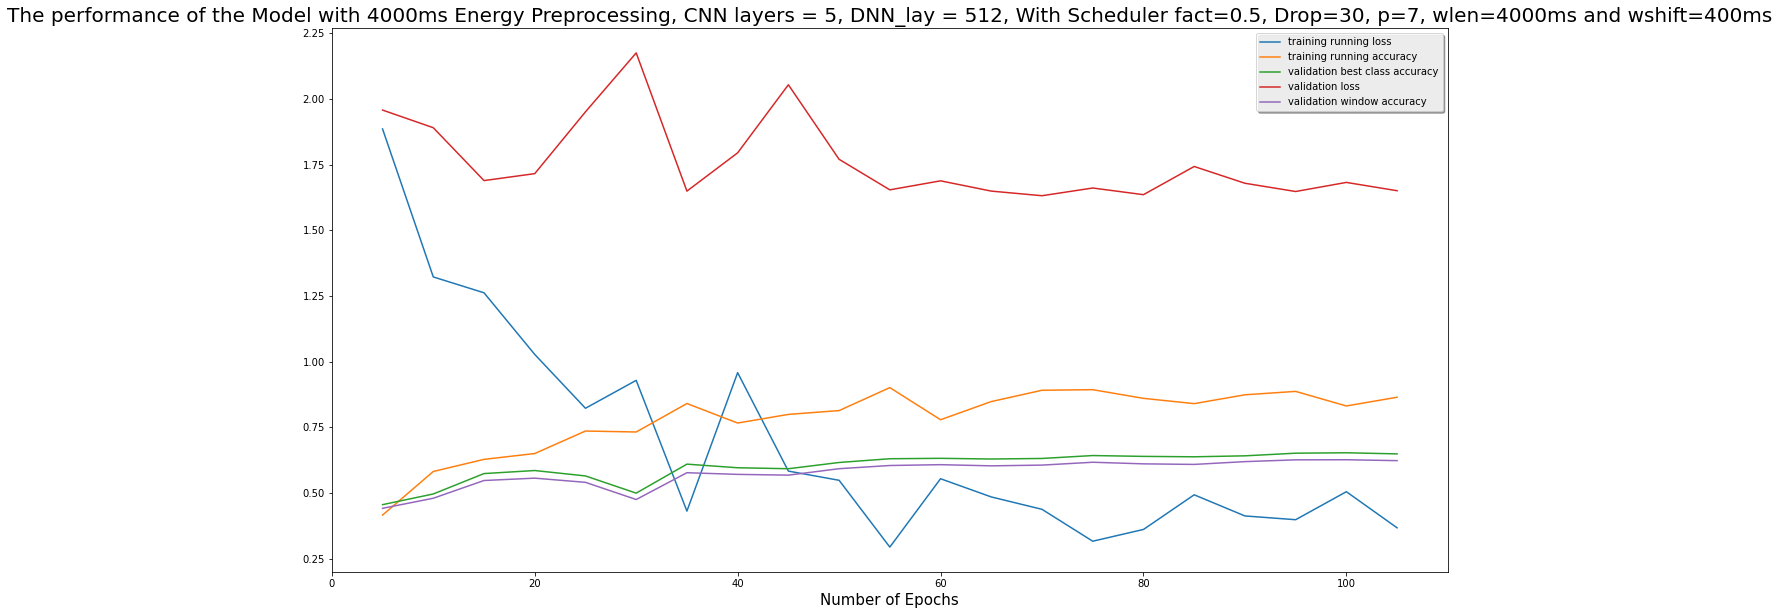


 				 Maximum accuracy in percentage on validation set is : 65.382

					    This model used 1,509,949 parameters.


In [22]:
## Organizing all the needed data in lists:
name = 'Model with 4000ms Energy Preprocessing, CNN layers = 5, DNN_lay = 512, With Scheduler fact=0.5, Drop=30, p=7, wlen=4000ms and wshift=400ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format("1,509,949"))

#### 3- Results of the model with a CNNlays=4, DNNSize=256, Conv2d kernel = (5, 3), maxpool = (2f, 2t), Energy_size =600, Energy_stride = 300, initial lr=0.0005

In [23]:
path = "exp/SincNet2D_DCASE/CNNlay4_Rand0PreEnergy4000ms_DNN256_Scheduler_Window4000ms_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

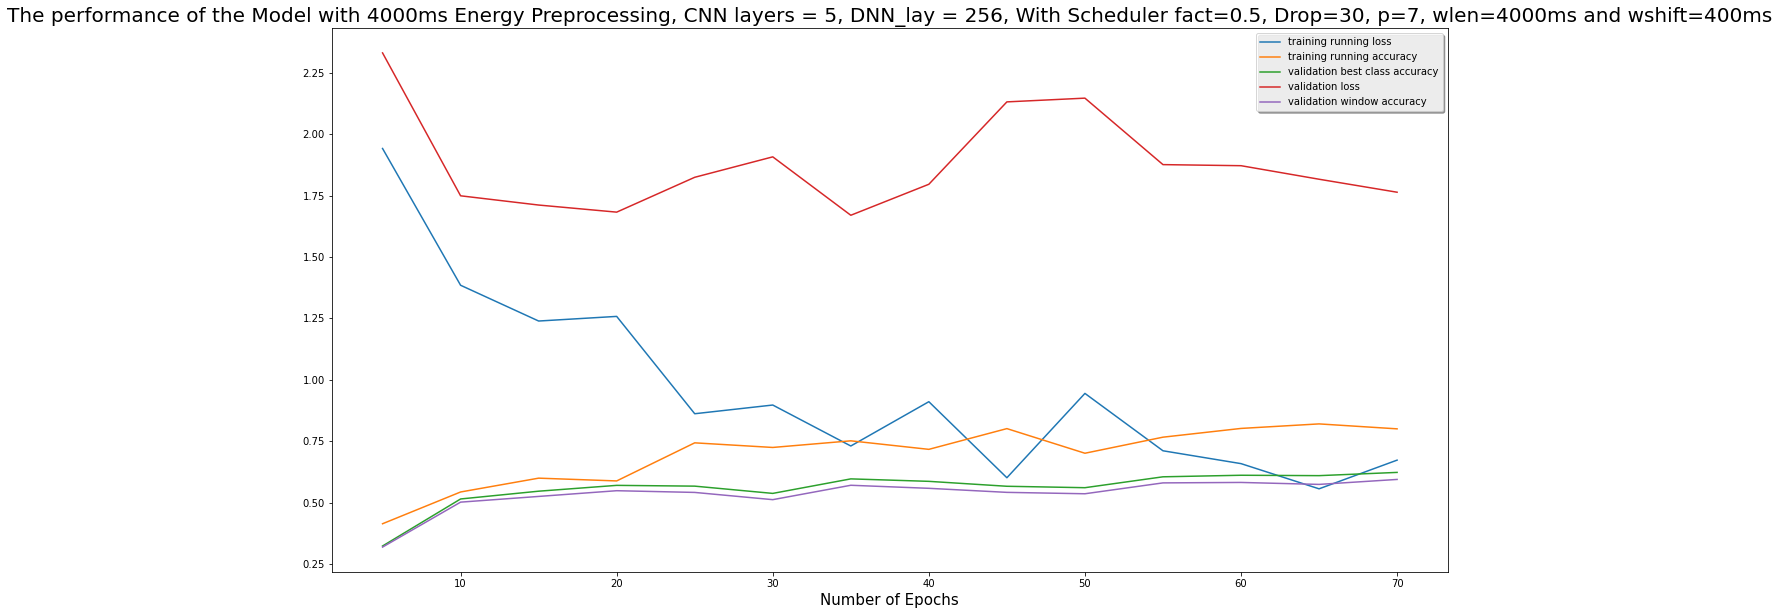


 				 Maximum accuracy in percentage on validation set is : 62.269

					    This model used 694,333 parameters.


In [24]:
## Organizing all the needed data in lists:
name = 'Model with 4000ms Energy Preprocessing, CNN layers = 5, DNN_lay = 256, With Scheduler fact=0.5, Drop=30, p=7, wlen=4000ms and wshift=400ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format("694,333"))

### IV- With 5000ms processing and wlen = 4000ms and fs=16kHz:

#### 1- Results of the model with a CNNlays=4, DNNSize=256, Conv2d kernel = (5, 3), maxpool = (2f, 2t), Energy_size =600, Energy_stride = 300, initial lr=0.0005

In [25]:
path = "exp/SincNet2D_DCASE/CNNlay4_Rand0PreEnergy5000ms_16kHz_DNN256_Scheduler_Window4000ms_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

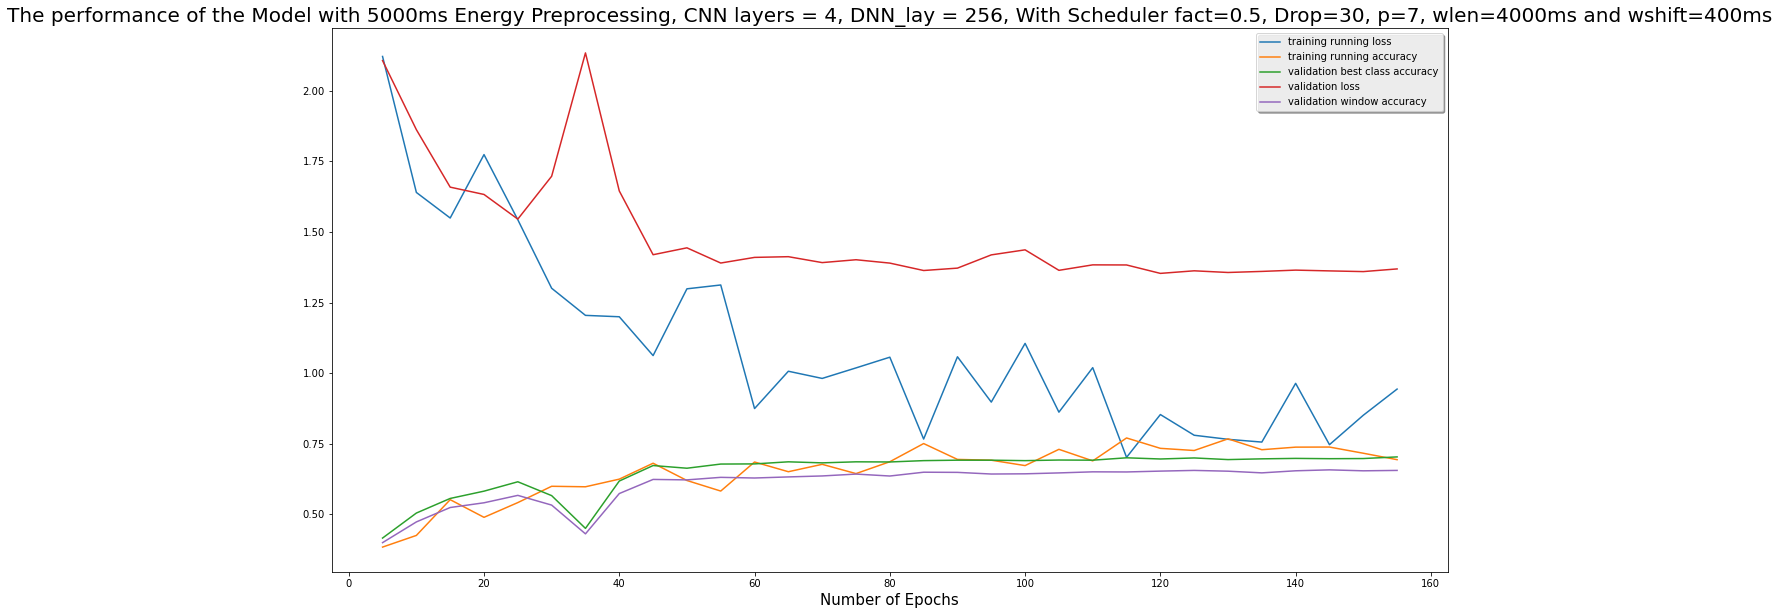


 				 Maximum accuracy in percentage on validation set is : 70.29

					    This model used 694,333 parameters.


In [26]:
## Organizing all the needed data in lists:
name = 'Model with 5000ms Energy Preprocessing, CNN layers = 4, DNN_lay = 256, With Scheduler fact=0.5, Drop=30, p=7, wlen=4000ms and wshift=400ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format("694,333"))

#### 2- Results of the model with a CNNlays=4, DNNSize=512, Conv2d kernel = (5, 3), first_maxpool=(1,1), second_maxpool = (3f, 2t), third_maxpool = (2f, 2t), Energy_size =600, Energy_stride = 300, initial lr=0.0005

In [27]:
path = "exp/SincNet2D_DCASE/CNNlay4_Rand0PreEnergy5000ms_16kHz_DNN512_Scheduler_Window4000ms_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

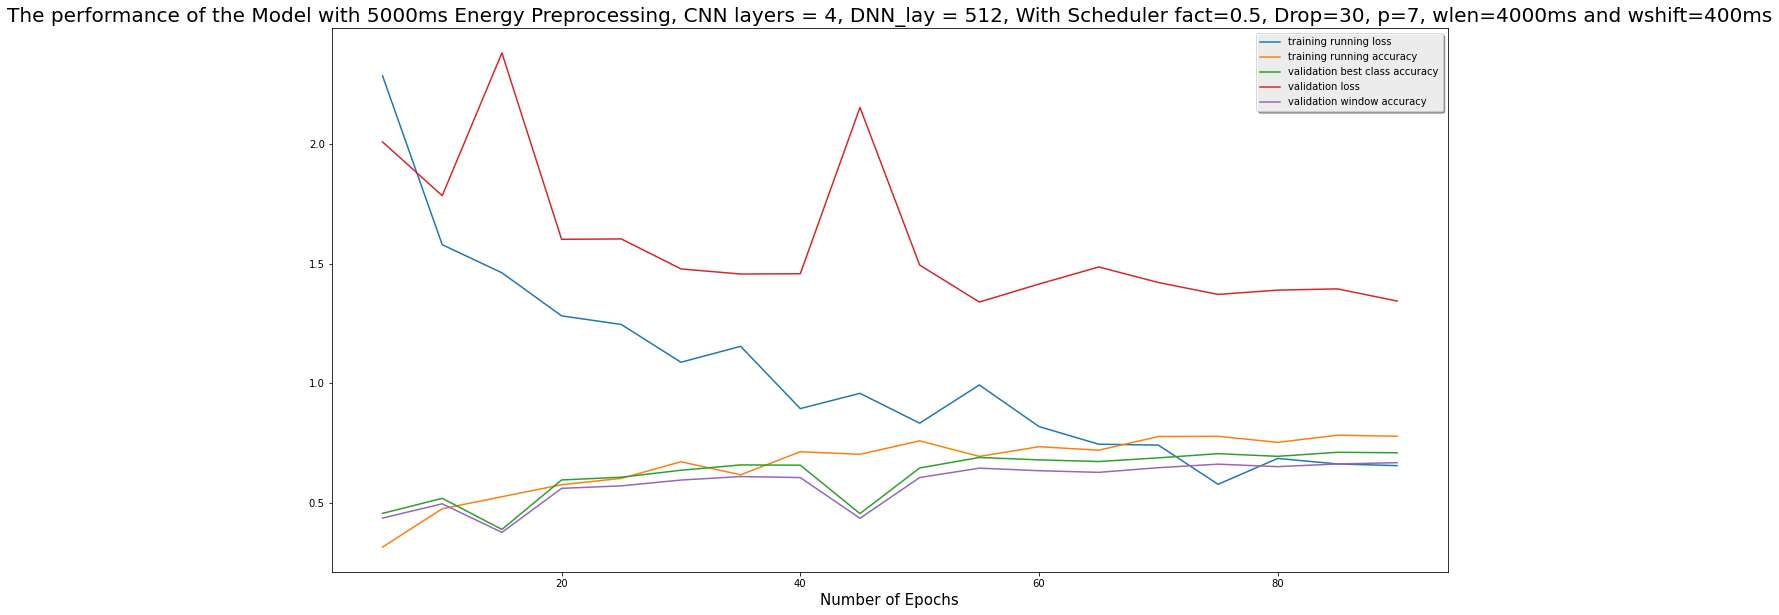


 				 Maximum accuracy in percentage on validation set is : 71.292

					    This model used 2,650,557 parameters.


In [28]:
## Organizing all the needed data in lists:
name = 'Model with 5000ms Energy Preprocessing, CNN layers = 4, DNN_lay = 512, With Scheduler fact=0.5, Drop=30, p=7, wlen=4000ms and wshift=400ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format("2,650,557"))

#### 3- Results of the model with a CNNlays=4, DNNSize=256, Conv2d kernel = (5, 3), first_maxpool=(1,1), second_maxpool = (3f, 2t), third_maxpool = (2f, 2t), Energy_size =600, Energy_stride = 300, initial lr=0.0005

In [29]:
path = "exp/SincNet2D_DCASE/CNNlay4_Rand0PreEnergy5000ms_16kHz_DNN256_FirstMaxpoolW1_Scheduler_Window4000ms_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

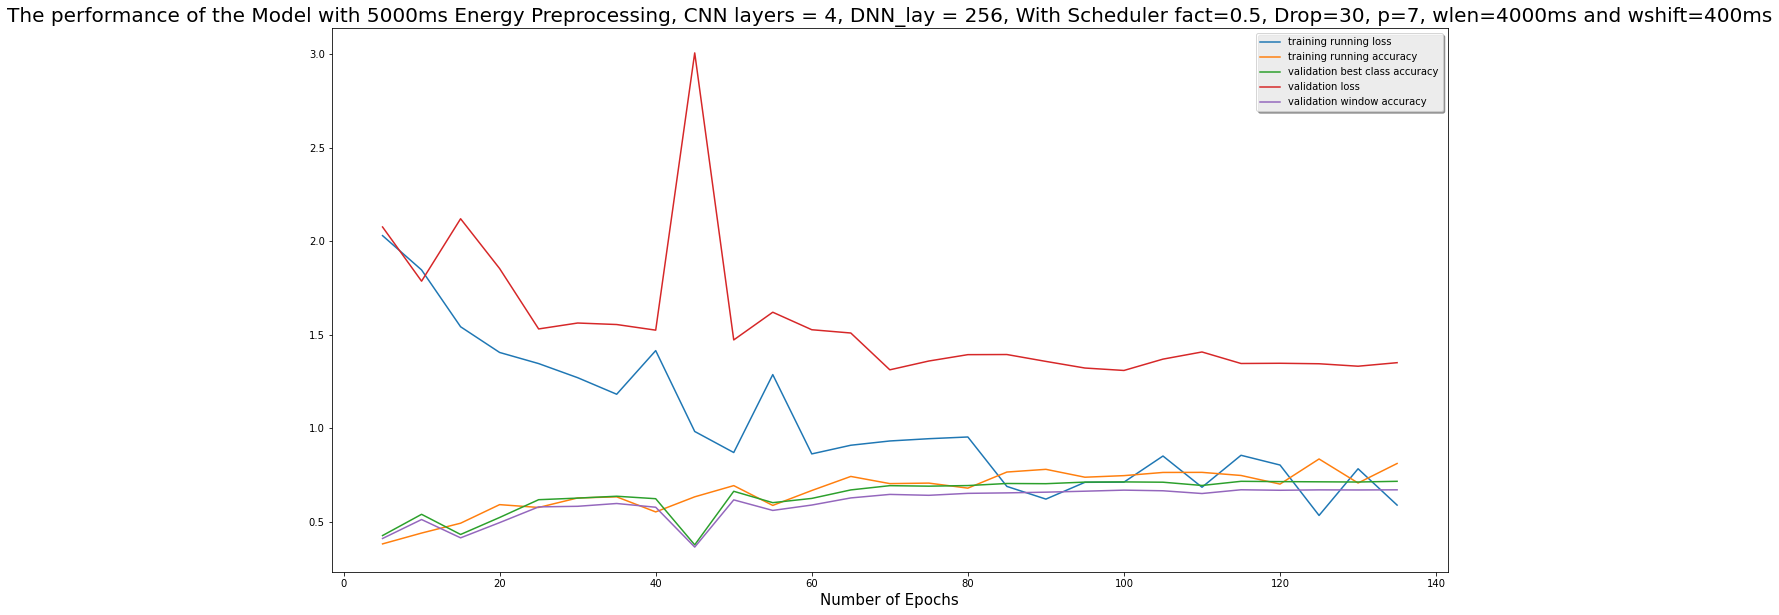


 				 Maximum accuracy in percentage on validation set is : 71.714

					    This model used 1,437,373 parameters.


In [30]:
## Organizing all the needed data in lists:
name = 'Model with 5000ms Energy Preprocessing, CNN layers = 4, DNN_lay = 256, With Scheduler fact=0.5, Drop=30, p=7, wlen=4000ms and wshift=400ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format("1,437,373"))

##### Fixed bug version:

In [31]:
path = "exp/SincNet2D_DCASE/CNNlay4_Rand0PreEnergy5000ms_16kHz_DNN256_FirstMaxpoolW1_Scheduler_Window4000ms_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + "_Notebook.res"

used_var, indexes = readResults(path, filename)

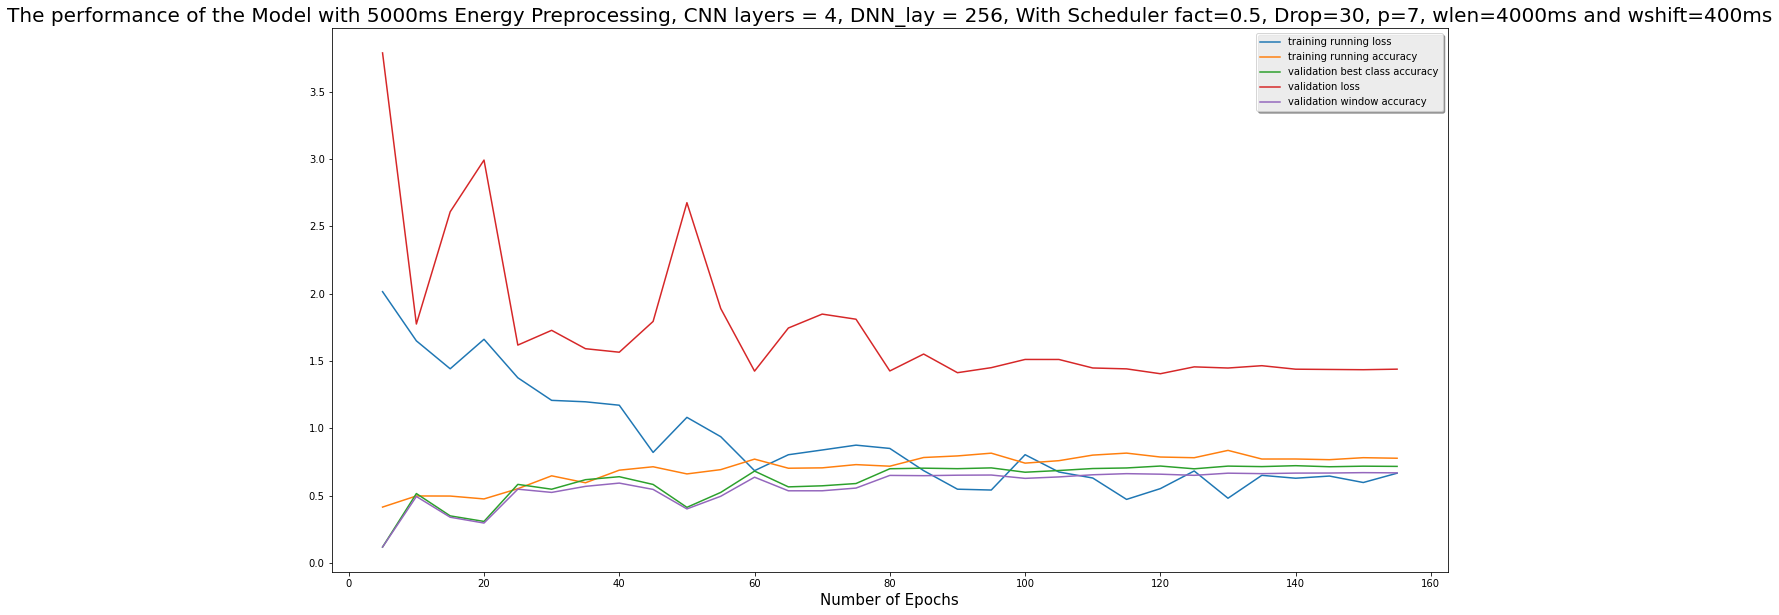


 				 Maximum accuracy in percentage on validation set is : 72.348

					    This model used 1,437,215 parameters.


In [32]:
## Organizing all the needed data in lists:
name = 'Model with 5000ms Energy Preprocessing, CNN layers = 4, DNN_lay = 256, With Scheduler fact=0.5, Drop=30, p=7, wlen=4000ms and wshift=400ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format("1,437,215"))

### V- With 5000ms processing and wlen = 4000ms and fs=32kHz:

#### 1- vggish aproximation, 64 SincNet filters:

In [34]:
path = "exp/SincNet2D_DCASE/CNNlay4_Rand0PreEnergy5000ms_DNN256_32kHz_Energy2048_batchsize16_Scheduler_Window4000ms_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + "_Notebook.res"

used_var, indexes = readResults(path, filename)

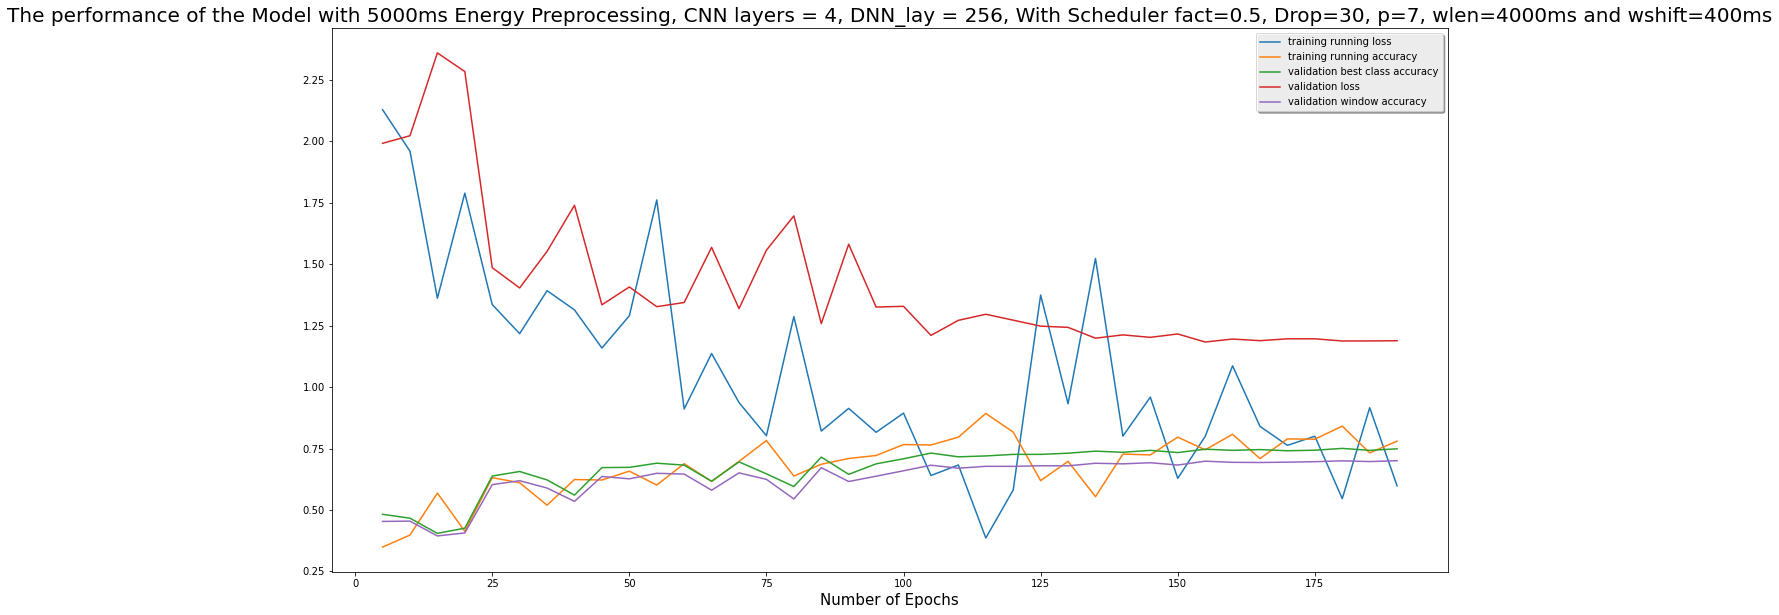


 				 Maximum accuracy in percentage on validation set is : 75.039

					    This model used 1,011,233 parameters.


In [35]:
## Organizing all the needed data in lists:
name = 'Model with 5000ms Energy Preprocessing, CNN layers = 4, DNN_lay = 256, With Scheduler fact=0.5, Drop=30, p=7, wlen=4000ms and wshift=400ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format("1,011,233"))

### VI- With 5000ms processing and wlen = 4000ms and fs=32kHz:

#### 1- vggish aproximation, 64 SincNet filters:

In [47]:
path = "exp/SincNet2D_DCASE/CNNlay4_Rand0PreEnergy4400ms_DNN256_32kHz_Energy2048_batchsize20_Scheduler_Window4000ms_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

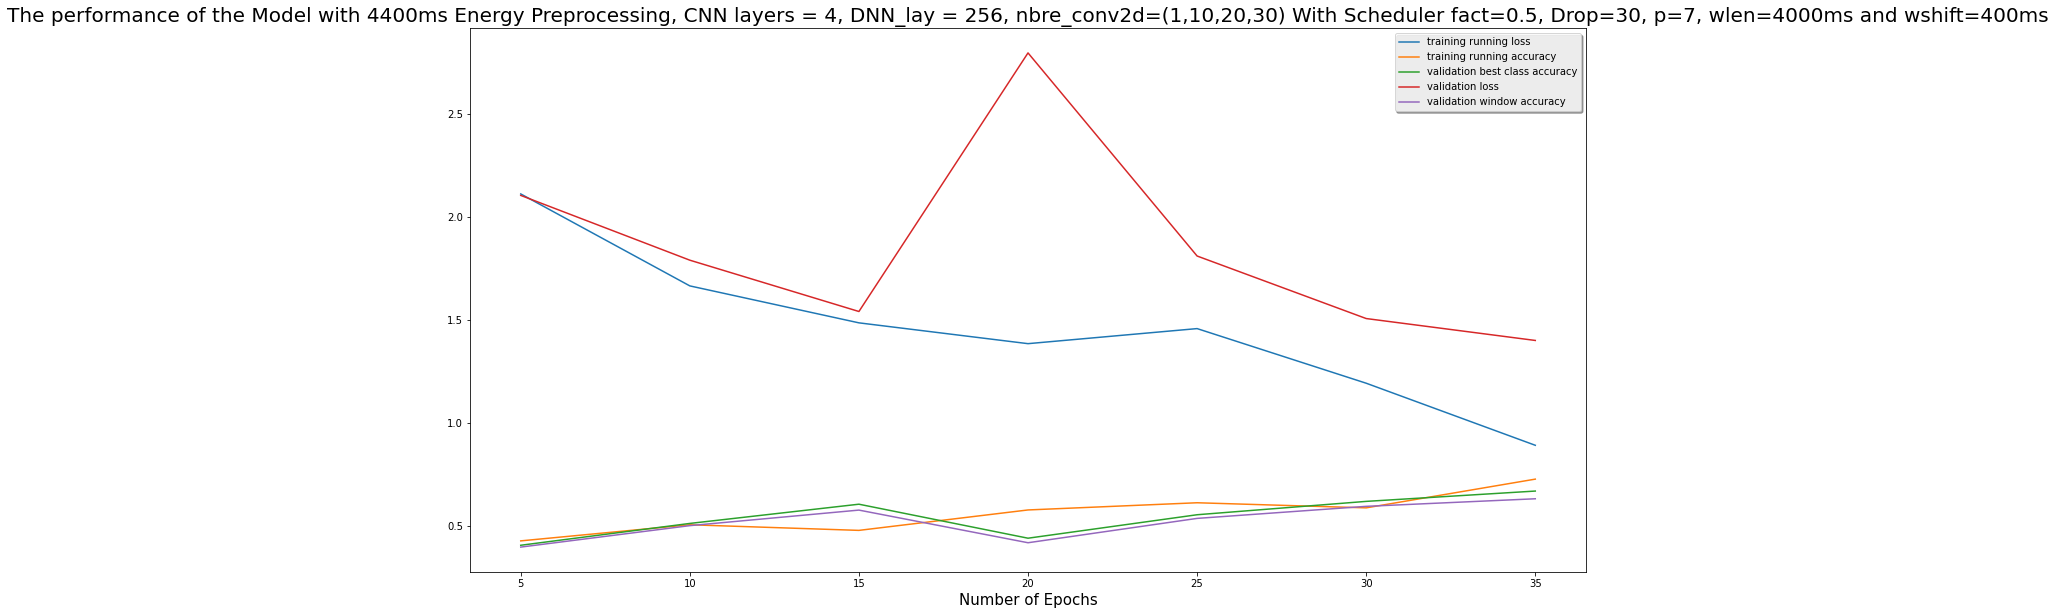


 				 Maximum accuracy in percentage on validation set is : 66.754

					    This model used 1,011,233 parameters.


In [48]:
## Organizing all the needed data in lists:
name = 'Model with 4400ms Energy Preprocessing, CNN layers = 4, DNN_lay = 256, nbre_conv2d=(1,10,20,30) With Scheduler fact=0.5, Drop=30, p=7, wlen=4000ms and wshift=400ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format("1,011,233"))

#### 2- vggish aproximation, 64 SincNet filters, more conv2ds:

In [49]:
path = "exp/SincNet2D_DCASE/CNNlay4_Rand0PreEnergy4400ms_DNN512_32kHz_Energy2048_batchsize20_Scheduler_More2dconvs_Window4000ms_Drop30/"

filename = path.split("/")[-2] if path.split("/")[-1]=="" else path.split("/")[-1]
filename = filename + ".res"

used_var, indexes = readResults(path, filename)

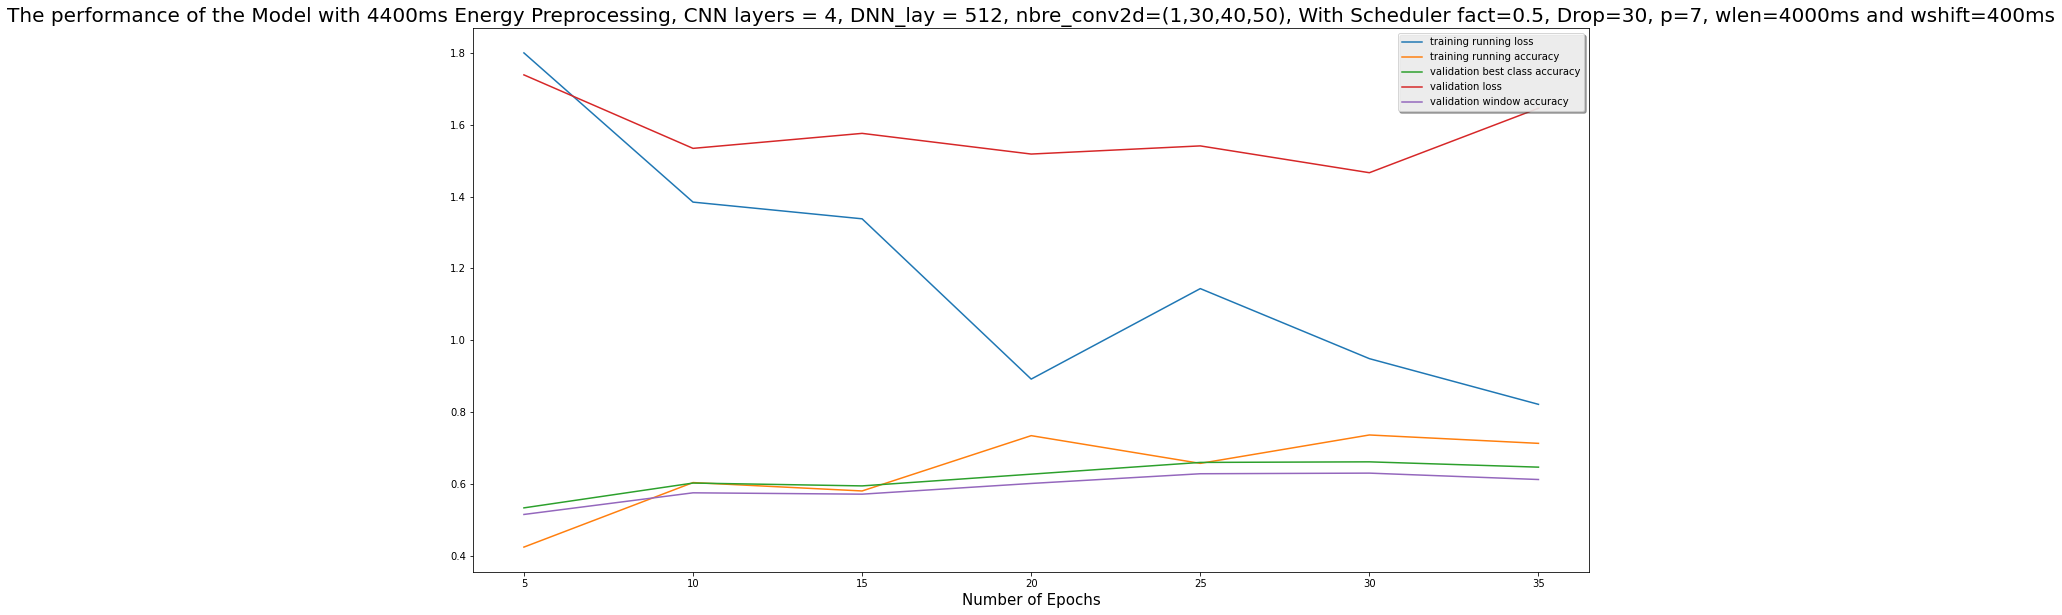


 				 Maximum accuracy in percentage on validation set is : 66.121

					    This model used 2,500,377 parameters.


In [50]:
## Organizing all the needed data in lists:
name = 'Model with 4400ms Energy Preprocessing, CNN layers = 4, DNN_lay = 512, nbre_conv2d=(1,30,40,50), With Scheduler fact=0.5, Drop=30, p=7, wlen=4000ms and wshift=400ms'

PlotPerfs(name, used_var)
print("\n\t\t\t\t\t    This model used {} parameters.".format("2,500,377"))